In [1]:
import sys
import h5py
import matplotlib.pyplot as plt
import numpy as np

sys.path.append('/Users/rebeccaceppas/Desktop/CHORD/H-GASP')

import observations as obs

%load_ext autoreload
%autoreload 2

# Up-channelization of a map

This is for a pre-made map containing galaxies from the catalog or for maps with different 21cm components.
You can provide more than one map and they will be added up and produce a single up-channelized full map. 
To do that, just provide a list of the filenames for the map_paths variable below. 

You have the option of computing R and norm or just labelling their location on your machine if you already have them computed (just skip the upchan.get_R_norm() step in that case).

In [4]:
U = 8

fmax = 1420
fmin = 1410

map_paths = './input_map.h5'
output_directory = './'
output_filename = 'upchan_map.h5'
R_filename = 'R_{}.npy'.format(U)
norm_filename = 'norm_{}.npy'.format(U)
freq_filename = 'freqs_matrix.npy'

upchan = obs.Upchannelization(U,
                             fmax,
                             fmin,
                             output_directory,
                             output_filename, R_filename=R_filename,
                             norm_filename=norm_filename,
                             freqs_matrix_filename=freq_filename)

In [5]:
# computing reponse matrix and normalization vector

upchan.get_R_norm()

Up-channelization matrix with shape (152, 617) saved to ./R_8.npy.
Normalization vector with shape (152,) saved to ./norm_8.npy.
Matrix frequencies with shape (152,) saved to ./freqs_matrix.npy


In [6]:
# up-channelizing input map

upchan.upchannelize(map_paths=map_paths)

The exact frequency specifications of this observation are:
f_start = 1420.258578293615, f_end = 1409.1346649243105, nfreq = 152.
Use these exact values when computing the beam transfer matrices with drift.
Writing file ./full_input.h5 containing the input maps ./input_map.h5.
Channelized map saved at ./upchan_map.h5


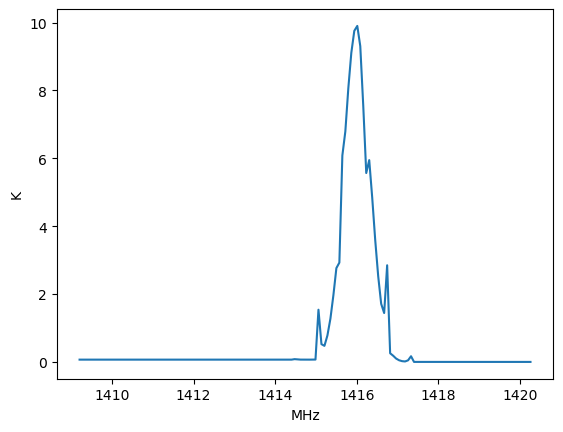

In [7]:
# looking at result
fff = h5py.File('upchan_map.h5')
upchan_map = fff['map'][:]
farray = fff['index_map']['freq']
freqs = [fi[0] for fi in farray]
fff.close()

gal_pix = np.argmax(upchan_map[20,0,:])

plt.plot(freqs, upchan_map[:,0,gal_pix])
plt.xlabel('MHz')
plt.ylabel('K')
plt.show()

# Up-channelization of a catalog

In [8]:
fmax = 1420
fmin = 1408

U = 8

nside = 32

output_directory = './catalog/'

output_filename = 'upchan_catalog.h5'

R_filename = 'R_{}.npy'.format(U)
norm_filename = 'norm_{}.npy'.format(U)
freq_filename = 'freqs_matrix_{}.npy'.format(U)

In [9]:
upchan_catalog = obs.Upchannelization(U, fmax, fmin, output_directory, output_filename, R_filename, norm_filename, freq_filename)

In [10]:
upchan_catalog.get_R_norm()

Up-channelization matrix with shape (176, 689) saved to ./catalog/R_8.npy.
Normalization vector with shape (176,) saved to ./catalog/norm_8.npy.
Matrix frequencies with shape (176,) saved to ./catalog/freqs_matrix_8.npy


In [11]:
upchan_catalog.upchannelize(catalog=True, catalog_filepath='HI_Catalog.txt', nside=nside)

The exact frequency specifications of this observation are:
f_start = 1420.258578293615, f_end = 1407.3782575502098, nfreq = 176.
Use these exact values when computing the beam transfer matrices with drift.
Creating up-channelized map from catalog HI_Catalog.txt with nside = 32.
Generating spectra for 10000 galaxies.
Up-channelizing spectra
Generating map
Channelized map saved at ./catalog/upchan_catalog.h5


In [12]:
# looking at result
fff = h5py.File('./catalog/upchan_catalog.h5')
upchan_catalog_map = fff['map'][:]
farray = fff['index_map']['freq']
freqs_catalog = [fi[0] for fi in farray]
fff.close()

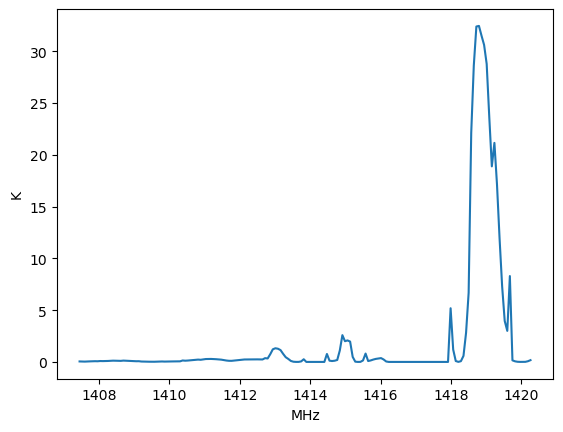

In [13]:
gal_pix = np.argmax(upchan_catalog_map[20,0,:])

plt.plot(freqs_catalog, upchan_catalog_map[:,0,gal_pix])
plt.xlabel('MHz')
plt.ylabel('K')
plt.show()